[ 0.05644181 -0.10053658  0.01865792]
[-0.54037965  1.69765273 -0.33333333]
[ 0.05644181 -0.25409775  0.25987124]
[-0.42749603  1.34301839 -0.05480418]


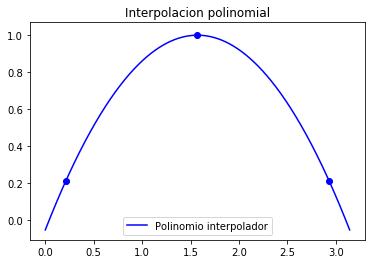

p(1): 0.8607181821267218


In [21]:
# Ejercicio 1: Interpolacion polinomial
# f(x) = sen(x)
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

"""
    lagrange_interpolation: 
     Encuentra el polinomio interpolador de 'f' en [a, b] usando polinomios de lagrange de orden n
     Si 'cheby' es True se usan nodos de chebyshev, de lo contrario equiespaciados
     Devuelve [an,..., a1, a0] que es como np.polyval() recibe los coeficientes
"""
def lagrange_interpolation(a, b, n, f, cheby):
    if cheby:
        zj = [np.cos((2*j+1)/(2*(n+1))*np.pi) for j in range(n+1)]
        x_nodes = [(b+a)/2 + (b-a)/2*z for z in zj] 
    else:
        x_nodes = np.linspace(a, b, n + 1)
    y_nodes = [f(x) for x in x_nodes]
    # hay n+1 polinomios con n+1 coeficientes
    lag_pols = np.zeros((n + 1, n + 1)) 
    for k in range(len(x_nodes)):
        # Formamos el polinomio de lagrange k a partir de sus raices
        lag_roots = np.delete(x_nodes, k)
        lag_pols[k] = np.flip(poly.polyfromroots(lag_roots)) / np.prod(x_nodes[k] - lag_roots) * y_nodes[k]
        print(lag_pols[k])  # comentar si no se quieren ver los polinomios de Lagrange
    interp_poly = np.sum(lag_pols, axis=0)
    
    return (interp_poly, (x_nodes, y_nodes))
    
n = 2
a = 0
b = np.pi
pol, nodes = lagrange_interpolation(a, b, n, 
                             lambda x: np.sin(x), True)
print(pol)

time = np.linspace(a, b, 1000)
plt.figure()
plt.plot(time, np.polyval(pol, time), label='Polinomio interpolador', color='b')
plt.scatter(nodes[0], nodes[1], marker='o', color='b')
plt.title(f'Interpolacion polinomial')
plt.legend()
plt.show()

print(f'p(1): {np.polyval(pol, 1)}')

In [22]:
# Ejercicio 2: Iteracion Newton Raphson
# f(x) = x^3 - 3

import iterative



def fun_newton(x):
    return x**3 - 3

# f'(x) = 3x^2
def fprime_newton(x):
    return 3*x**2

a = 0.5
b = 1.5
prec = 1e-9
root_nr = iterative.newton_raphson(a, b, prec, fun_newton, fprime_newton)
print(f'Raiz por Newton: {root_nr}')

Raiz en iteracion 1: x1 = 1.6666666666666665
Raiz en iteracion 2: x2 = 1.471111111111111
Raiz en iteracion 3: x3 = 1.4428120982493433
Raiz en iteracion 4: x4 = 1.4422497895989996
Raiz en iteracion 5: x5 = 1.4422495703074416
Raiz en iteracion 6: x6 = 1.4422495703074083
Raiz por Newton: 1.4422495703074083


In [23]:
# Ejercicio 4: Iteracion Gauss-Seidel

# Calculan xi en la iteracion k, recibe el arreglo de los xk-1 y de los xk
# Cada xi sabe si tiene que usar para cada variable el valor actual xk o el anterior xk-1

def x1(xk, xk_1):
    return (-4 - 2*xk_1[1] + 2*xk_1[2] - 2*xk_1[3])/(7)

def x2(xk, xk_1):
    return (1 - 2*xk[0] + 2*xk_1[2] - 2*xk_1[3])/(7)
    
def x3(xk, xk_1):
    return (20 + 2*xk[0] + 2*xk[1] + 2*xk_1[3])/(7)
    
def x4(xk, xk_1):
    return (-2*xk[0] + 2*xk[1] - 2*xk[2])/(-8)
    
# xi: Arreglo de callbacks que reciben la iteracion actual y la anterior y devuelven el valor de las variables
def gauss_seidel(xi, xo, n):
    x = np.zeros((n, len(xo)))
    x[0] = xo
    for k in range(n):
        for j in range(len(xo)):
            x[k][j] = xi[j](x[k], x[k-1])
    
    return x

xo = [0, 0, 0, 0]
callbacks = [x1, x2, x3, x4]
n = 2
x = gauss_seidel(callbacks, xo, 2)
print(f'{x}')

[[-5.71428571e-01  3.06122449e-01  2.78134111e+00  4.75947522e-01]
 [-2.08246564e-04  8.01600524e-01  3.22209709e+00  6.05072079e-01]]


In [35]:
# Ejercicio 5: EDO Taylor
# y' = -y cos(t)

from ode_methods import print_result

def taylor(order, to, h, n, yderiv, yo):
    if (type(yo) is int) or (type(yo) is float):
        yo = [yo]
    y = np.zeros((n+1, len(yo)))
    y[0] = yo
    t = to
    for k in range(1, n+1):
        y[k] = y[k-1]
        for i in range(order):
            y[k] += h**(i+1)*((yderiv[i])(t, y[k-1]))/np.math.factorial(i+1)
        t = t + h
    return y

def y_deriv_1(tn, yn):
    print(f'f({tn}, {yn}): {-yn*np.cos(tn)}')
    return -yn*np.cos(tn)

def y_deriv_2(tn, yn):
    return -np.cos(tn) + yn*np.sin(tn)

yo = 1
to = 0
order = 2
h = 0.1
n = 2
y = taylor(order, 
             to, 
             h, 
             n, 
             [
                 lambda tn, yn: (-yn*np.cos(tn)),
                 lambda tn, yn: (-np.cos(tn) + yn*np.sin(tn))
             ],
             yo)

print_result(f'Taylor orden {order}', n, y[1:], None)

f(0, [1.]): [-1.]
f(0.1, [0.895]): [-0.89052873]
Taylor orden 2 con 2 pasos
[[0.895     ]
 [0.80141886]]
 
